## Lecture Note

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

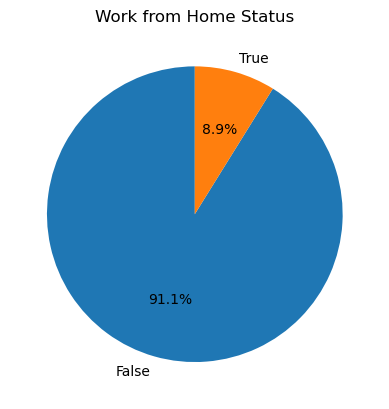

In [14]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

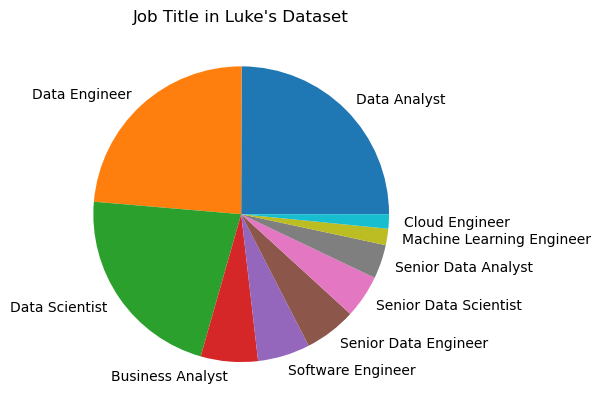

In [15]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Title in Luke's Dataset")
plt.ylabel('')
plt.show()
# This is not a great way to use pie chart because there are to many variables
# which makes the chart unreadable, where, for instance,
# readers is hindered from comparing Data Engineer and Data Analyst conveniently
# It is idiomatic to use pie chart when there are two variables, 
# especially boolean value since there are only True of False


In [16]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


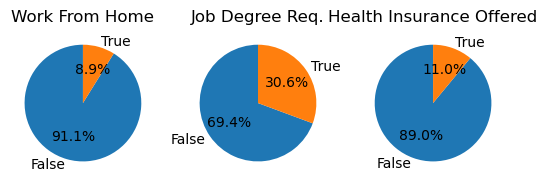

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    


## Homework

job_health_insurance
False    171351
True      24724
Name: count, dtype: int64


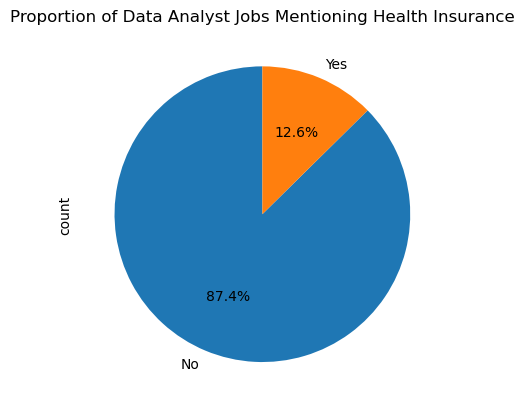

In [35]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_da_insurance_count = df_da['job_health_insurance'].value_counts()
print(df_da_insurance_count)
df_da_insurance_count.plot(kind='pie',startangle=90,autopct='%1.1f%%',labels=['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()


Text(0.5, 1.0, 'Job Schedule Full-time vs. Part-time')

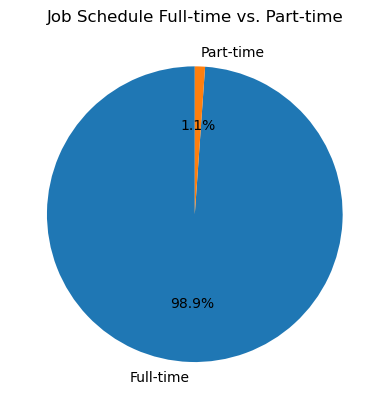

In [ ]:
schedule_type = ['Full-time','Part-time']
df_ft_pt = df[df['job_schedule_type'].isin(schedule_type)]
df_ft_pt['job_schedule_type'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Job Schedule Full-time vs. Part-time')

job_no_degree_mention
False    169655
True      36637
Name: count, dtype: int64


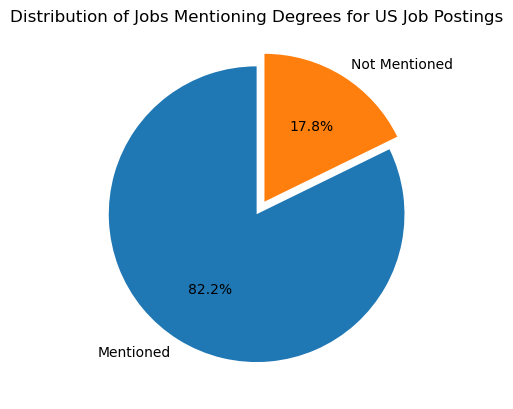

In [97]:
df_us = df[df['job_country']=='United States']
print(df_us['job_no_degree_mention'].value_counts())
df_us['job_no_degree_mention'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',labels=['Mentioned','Not Mentioned'],explode=[0,0.1])
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()